In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_CA = df[df['job_country'] == 'Canada'].copy()

In [3]:
df_CA['job_posted_month'] = df_CA['job_posted_date'].dt.strftime('%B')

df_CA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,"['python', 'sql', 'pytorch', 'pandas']","{'libraries': ['pytorch', 'pandas'], 'programm...",August
59,Data Engineer,Data Engineer with Dremio Experience,"Toronto, ON, Canada",via LinkedIn,Contractor,False,Canada,2023-08-28 13:35:13,True,False,Canada,None,NaN,NaN,Iris Software Inc.,"['sql', 'hadoop', 'kubernetes']","{'libraries': ['hadoop'], 'other': ['kubernete...",August
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,None,NaN,NaN,027 Parks Culture and Sport,None,None,March
85,Machine Learning Engineer,Machine Learning Engineer/Scientist High Perfo...,Anywhere,via LinkedIn,Full-time,True,Canada,2023-11-21 13:13:33,False,False,Canada,None,NaN,NaN,Haiper,"['python', 'pytorch']","{'libraries': ['pytorch'], 'programming': ['py...",November
98,Senior Data Engineer,Senior Data Engineer (AWS),"Toronto, ON, Canada",via SmartRecruiters Job Search,Full-time,False,Canada,2023-09-01 13:42:05,True,False,Canada,None,NaN,NaN,MUFG Investor Services,"['python', 'aws', 'databricks', 'spark']","{'cloud': ['aws', 'databricks'], 'libraries': ...",September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785317,Data Engineer,"Data Engineer, Finance Data","Toronto, ON, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-21 06:59:35,False,False,Canada,None,NaN,NaN,OMERS,"['sql', 'python', 'sql server', 'snowflake', '...","{'analyst_tools': ['ssrs', 'ssis'], 'cloud': [...",January
785327,Data Engineer,Azure Data Engineer,"Toronto, ON, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-25 06:18:35,False,False,Canada,None,NaN,NaN,Tiger Analytics,"['sql', 'azure']","{'cloud': ['azure'], 'programming': ['sql']}",January
785339,Data Engineer,Data Engineering Consultant,"Montreal, QC, Canada",via BeBee Canada,Full-time,False,Canada,2023-04-11 06:11:34,True,False,Canada,None,NaN,NaN,CGI,"['sql', 'python', 'sql server', 'mysql', 'post...","{'analyst_tools': ['tableau', 'power bi', 'loo...",April
785511,Data Engineer,Data Engineer,"Montreal, QC, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-18 06:17:13,False,False,Canada,None,NaN,NaN,CGI,"['sql', 'nosql', 'python', 'java', 'cassandra'...","{'cloud': ['azure', 'snowflake', 'databricks',...",January


In [4]:
df_CA_pivot = df_CA.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [10]:
df_US_Sf_pivot= pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

In [13]:
df_example_merge = df_CA_pivot.merge(df_US_Sf_pivot, on='job_posted_month')

In [16]:
top_5 = df_example_merge.sum().sort_values(ascending=False).head(5).index.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

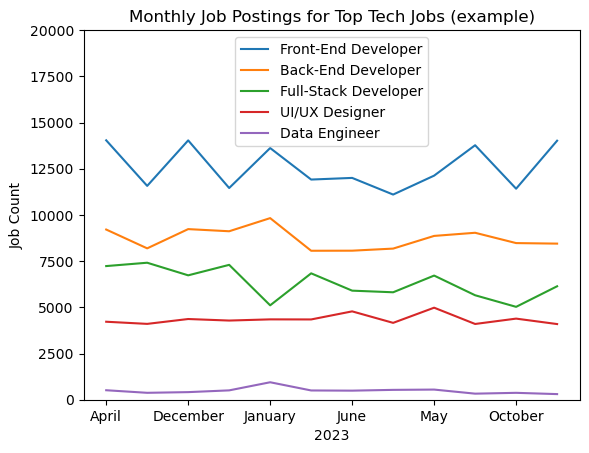

In [17]:
df_example_merge[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs (example)')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()
